Unsupervised Learning
---
Unsupervised learning is a class of machine learning techniques for discovering patterns in data. Unsupervised learning is having the machine learn from data that is not labelled, pattern discovery, unguided by prediction task.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [24]:
iris = pd.read_csv(r"C:\Users\Emigb\Documents\Data Science\datasets\iris.data.csv", names=["Petal Length", "Petal Width", "Sepal Length", "Sepal Width", "Species"])

iris_array =  iris.drop('Species', axis=1)
iris_array.head()

,Petal Length,Petal Width,Sepal Length,Sepal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
samples = iris_array.sample(n=100, random_state=33)
samples.head()

,Petal Length,Petal Width,Sepal Length,Sepal Width
96,5.7,2.9,4.2,1.3
65,6.7,3.1,4.4,1.4
29,4.7,3.2,1.6,0.2
54,6.5,2.8,4.6,1.5
134,6.1,2.6,5.6,1.4


Clustering 2D points
---
From the scatter plot of the previous exercise, you saw that the points seem to separate into 3 clusters. You'll now create a KMeans model to find 3 clusters, and fit it to the data points from the previous exercise. After the model has been fit, you'll obtain the cluster labels for some new points using the .predict() method.

You are given the array points from the previous exercise, and also an array new_points.

In [26]:
#1. Import KMeans from sklearn.cluster.
from sklearn.cluster import KMeans

#2. Using KMeans(), create a KMeans instance called model to find 3 clusters. 3. To specify the number of clusters, use the n_clusters keyword argument.
model =  KMeans(n_clusters = 3)

#3. Use the .fit() method of model to fit the model to the samples.
model.fit(samples)

#4. Use the .predict() method of model to predict the cluster labels of samples, assigning the result to labels.
labels = model.predict(samples)

# Print cluster labels of samples
print(labels)


[2 2 0 2 1 1 0 0 1 1 1 0 1 2 1 2 2 0 2 1 0 0 1 0 2 2 2 2 1 2 2 2 2 1 1 1 2
 2 2 0 2 2 2 0 0 2 0 1 0 0 2 1 0 2 2 1 2 2 0 0 2 0 0 1 2 2 1 1 1 2 0 0 2 2
 0 2 2 2 1 0 1 0 2 0 1 2 0 1 2 0 0 1 0 0 0 1 1 0 2 0]


Visualizing The clustering
----
Let's now inspect the clustering you performed in the previous exercise!

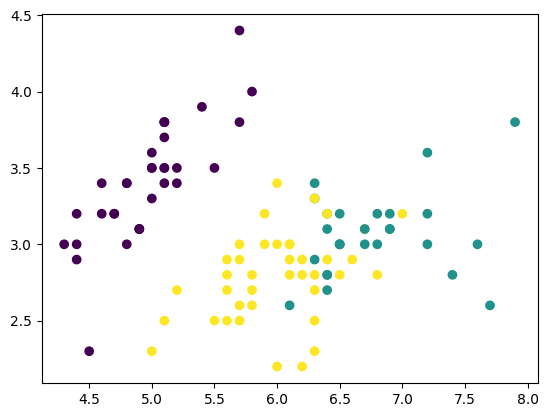

In [27]:
#2. Assign column 0 of samples to xs, and column 1 of samples to ys.
xs = samples.iloc[:,0]
ys = samples.iloc[:,1]


#3. Make a scatter plot of xs and ys, specifying the c=labels keyword arguments to color the points by their cluster label.
plt.scatter(xs,ys, c=labels);

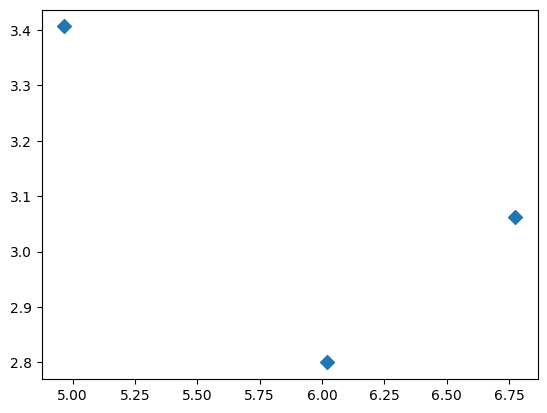

In [28]:
#4.Compute the coordinates of the centroids using the .cluster_centers_ attribute of model.
centroids = model.cluster_centers_

#5. Assign column 0 of centroids to centroids_x, and column 1 of centroids to centroids_y.
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

#6. Make a scatter plot of centroids_x and centroids_y, using 'D' (a diamond) as a marker by specifying the marker parameter. Set the size of the markers to be 50 using s=50.

plt.scatter(centroids_x, centroids_y, marker='D', s=50);

How many clusters of grain?
----
In the video, you learned how to choose a good number of clusters for a dataset using the k-means inertia graph. You are given an array samples containing the measurements (such as area, perimeter, length, and several others) of samples of grain. What's a good number of clusters in this case?

KMeans and PyPlot (plt) have already been imported for you.

This dataset was sourced from the UCI Machine Learning Repository.

In [47]:
grains = pd.read_csv(r"C:\Users\Emigb\Documents\Data Science\datasets\Grains\seeds.csv")
grains.head()

,1,2,3,4,5,6,7,Varieties
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Rosa
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Rosa
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Rosa
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Rosa
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Rosa


In [48]:
#Converting The PD DataFrame to a NumPy array
sample_g = grains.iloc[:, :-1].values   # all columns except last
varieties = grains.iloc[:, -1].values  # last column with variety names

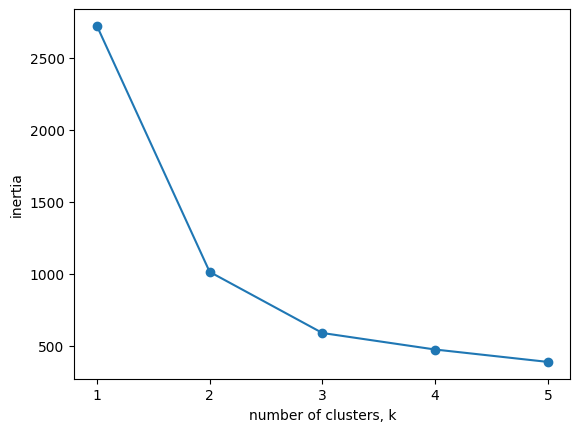

In [49]:
ks = range(1,6)
inertias = []

for k in ks:
    #1. Create a KMeans instance called model with k clusters.
    model = KMeans(n_clusters = k)

    #2. Fit the model to the grain data samples.
    model.fit(sample_g)

    #3. Append the value of the inertia_ attribute of model to the list inertias.
    inertias.append(model.inertia_)

#4. The code to plot ks vs inertias has been written for you, so hit submit to see the plot!
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks);

Evaluating the grain clustering
----
In the previous exercise, you observed from the inertia plot that 3 is a good number of clusters for the grain data. In fact, the grain samples come from a mix of 3 different grain varieties: "Kama", "Rosa" and "Canadian". In this exercise, cluster the grain samples into three clusters, and compare the clusters to the grain varieties using a cross-tabulation.

You have the array samples of grain samples(sample_g), and a list varieties giving the grain variety for each sample. Pandas (pd) and KMeans have already been imported for you.

In [50]:
#1. Create a KMeans model called model with 3 clusters.
kmeans = KMeans(n_clusters=3)

#2. Use the .fit_predict() method of model to fit it to samples and derive the cluster labels. Using .fit_predict() is the same as using .fit() followed by .predict().
labels_g = kmeans.fit_predict(sample_g)

#3. Create a DataFrame df with two columns named 'labels' and 'varieties', using labels and varieties, respectively, for the column values.
df = pd.DataFrame({'labels': labels_g, 'varieties': varieties})

#4. Use the pd.crosstab() function on df['labels'] and df['varieties'] to count the number of times each grain variety coincides with each cluster label. Assign the result to ct.
ct = pd.crosstab(df['labels'], df['varieties'])

print(ct)


varieties  Canadian  Kama  Rosa
labels                         
0                 2    10    60
1                68     0     9
2                 0    60     1


Scaling fish data for clustering
----
You are given an array samples giving measurements of fish. Each row represents an individual fish. The measurements, such as weight in grams, length in centimeters, and the percentage ratio of height to length, have very different scales. In order to cluster this data effectively, you'll need to standardize these features first. In this exercise, you'll build a pipeline to standardize and cluster the data.

These fish measurement data were sourced from the Journal of Statistics Education.

In [51]:
fish = pd.read_csv(r"C:\Users\Emigb\Documents\Data Science\datasets\fish.csv", header=None)
fish.head()

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [53]:
sample_f = fish.iloc[:, 1:].values

In [56]:
#1. Import relevant libraries
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [57]:
#2. Create an instance of StandardScaler called scaler.
scaler = StandardScaler()

#3. Create an instance of KMeans with 4 clusters called kmeans.
kmeansf = KMeans(n_clusters = 4)

#4. Create a pipeline called pipeline that chains scaler and kmeans. To do this, you just need to pass them in as arguments to make_pipeline().
pipeline = make_pipeline(scaler, kmeansf)